In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import p2mpp.utils.camera as camera
import torch
import numpy as np

In [75]:
medical_instrument = r"D:\ORamaVR\tmp\data\medical_instrument.dat"
import pickle
with open(medical_instrument, 'rb') as f:
    points = pickle.load(f, encoding="bytes")[:, :3]

In [76]:
camera_metadata = torch.tensor([270, -30, 0, 1.5, 35])
points = torch.tensor(points)

In [77]:

positions = camera.camera_trans(camera_metadata, points)

In [78]:

camera_f = (250., 250.)
camera_c = (112., 112.)

resolution = 224
half_resolution = (resolution - 1) / 2
camera_c_offset = np.array(camera_c) - half_resolution

In [79]:
X = positions[:,  0]
Y = positions[:, 1]
Z = positions[:, 2]

w = -camera_f[0] * (X / Z) + camera_c_offset[0]
h = camera_f[1] * (Y / Z) + camera_c_offset[1]

In [80]:
w += half_resolution
h += half_resolution

In [81]:
camera.draw_image_from_points_projection(h, w)

In [115]:
alpha = np.zeros((224, 224, 3), np.float32)
whiteboard = np.ones((3, 224, 224), np.float32)

In [116]:
import cv2
for x, y in zip(w, h):
    x = int(x)
    y = int(y)
    cv2.circle(
                alpha, (int(x), int(y)), radius=1, color=(1.0, 1.0, 1.0), thickness=-1
            )

In [117]:
from p2mpp.utils.vis.renderer import _process_render_result, _mix_render_result_with_image

In [118]:
color = np.array([0.9, 0.7, 0.7])

In [119]:
rgb = _process_render_result(alpha * color[None, None, :], 224, 224)
alpha = _process_render_result(alpha[:, :, 0], 224, 224)
rgb = _mix_render_result_with_image(rgb, alpha[0], whiteboard)

In [120]:
rgb.shape

(3, 224, 224)

In [121]:
rgb = np.transpose(rgb,(1, 2, 0))

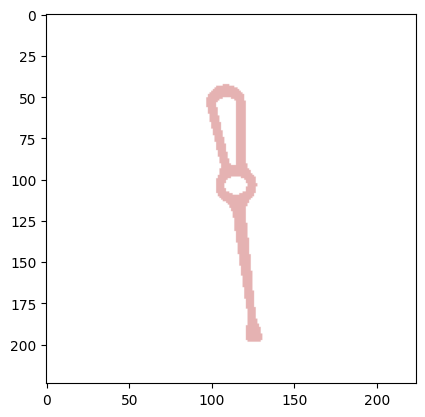

In [122]:
import matplotlib.pyplot as plt
plt.imshow(rgb)

In [123]:
with open("C:\ORamaVR\Python\Pixel2MeshPlusPlusTorch\models\ellipsoid\info_ellipsoid.dat", "rb") as f:
    ellipsoid = pickle.load(f, encoding="bytes")

In [126]:
ellipsoid[0].shape

(156, 3)

In [127]:
ellipsoid[0].mean(axis=0)

array([ 6.462339e-04,  9.615256e-04, -7.909229e-01], dtype=float32)